<a href="https://colab.research.google.com/github/Xavier-ML/Computational-Physics-with-Python/blob/main/Tarea_post_grado_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantum mechanics: Solving the stationary Schrödinger equation
Quantum well: Particle in an infinitely large box

analytical solution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Definir parametros h,m y a.

In [ ]:
h=1
m=0.5
a=1
nmax=5

In [ ]:
eigenenergieslistA=[]

j = 1

while j <= nmax:
    eigenenergiesA = (h**2)/(2*m*a**2)*(j**2)*(np.pi**2)/4
    j = j + 1
    eigenenergieslistA.append(eigenenergiesA)

In [ ]:
eigenenergieslistA

[2.4674011002723395,
 9.869604401089358,
 22.206609902451056,
 39.47841760435743,
 61.68502750680849]

In [ ]:
xlistA = []
dx=a*0.1
x= -1
a = 1

while x <= a:
    xlistA.append(x)
    x=x + dx

In [ ]:
xlistA

[-1,
 -0.9,
 -0.8,
 -0.7000000000000001,
 -0.6000000000000001,
 -0.5000000000000001,
 -0.40000000000000013,
 -0.30000000000000016,
 -0.20000000000000015,
 -0.10000000000000014,
 -1.3877787807814457e-16,
 0.09999999999999987,
 0.19999999999999987,
 0.2999999999999999,
 0.3999999999999999,
 0.4999999999999999,
 0.5999999999999999,
 0.6999999999999998,
 0.7999999999999998,
 0.8999999999999998,
 0.9999999999999998]

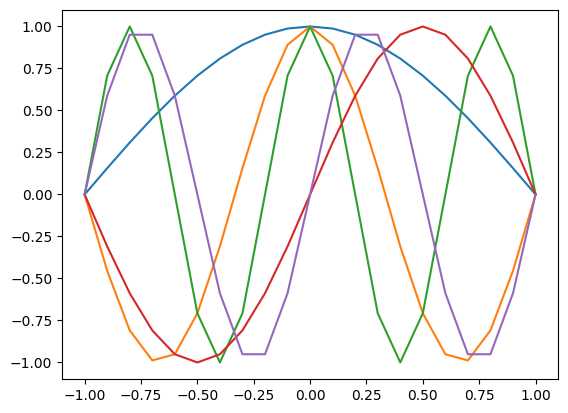

In [ ]:
psiAlistpar = []
psiAlistimpar = []
eigenfunctionslistApar = []
eigenfunctionslistAimpar = []
for j in range(nmax):
    if j%2 == 0:
        for x in xlistA:
            b = np.cos(np.sqrt(eigenenergieslistA[j])*x)
            psiAlistpar.append(b)
eigenfunctionslistApar.append([psiAlistpar])
for j in range(nmax):
    if j%2 != 0:
        for x in xlistA:
            c = np.sin(np.sqrt(eigenenergieslistA[j])*x)
            psiAlistimpar.append(c)
eigenfunctionslistAimpar.append([psiAlistimpar])

pares = set()
for x in range(nmax):
    if  x%2==0:
        pares.add(x)
        numpar = len(pares)

impares = set()
for y in range(nmax):
    if  y%2!=0:
        impares.add(y)
        numimpar = len(impares)
counter=0
while counter<numpar:
    plt.plot(xlistA, eigenfunctionslistApar[0][0][21*counter:21*counter + 21])
    counter=counter+1
    
counter = 0
while counter<numimpar:
    plt.plot(xlistA, eigenfunctionslistAimpar[0][0][21*counter:21*counter + 21])
    counter=counter+1


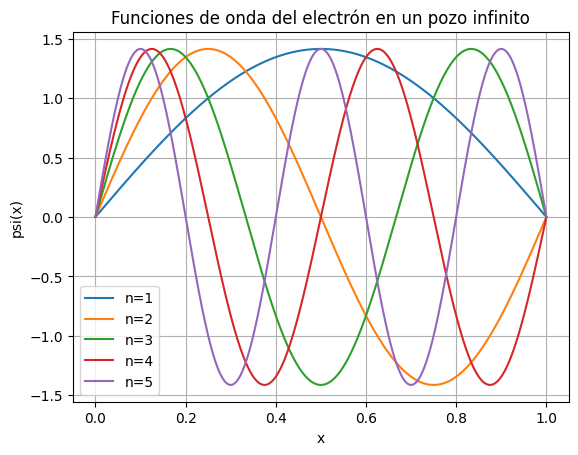

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def wavefunction_pozo_infinito(x, n):
    psi = np.sqrt(2) * np.sin(n * np.pi * x)  # Función de onda del nivel de energía n en el pozo infinito
    return psi

# Parámetros del pozo infinito
x_min = 0  # Límite inferior del pozo
x_max = 1  # Límite superior del pozo
n_levels = 5  # Número de niveles de energía para graficar

# Crear el vector de puntos x en el rango del pozo infinito
n_points = 1000  # Número de puntos entre x_min y x_max
x = np.linspace(x_min, x_max, n_points)

# Graficar todas las funciones de onda para los niveles de energía n=1 hasta n=n_levels
for n in range(1, n_levels+1):
    psi = wavefunction_pozo_infinito(x, n)
    plt.plot(x, psi, label=f'n={n}')

# Configuración de la gráfica
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.title('Funciones de onda del electrón en un pozo infinito')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Definir una función para calcular los elementos de la matriz
def funcion_aproximacion(y, n):
    f_p = (y**n)*(y+1)*(y-1)  # Función de proximación
    return f_p    # Ejemplo: Suma de los índices

def matriz_s(m,n):
    if (m+n)%2 == 0:
        s_m_n = 2/(m + n + 5) - 4/(m + n + 3) + 2/(m + n + 1)
    else:
        s_m_n = 0
    return s_m_n
# Crear una matriz cuadrada de dimensión n y guardar los elementos de en la matriz s

def matriz_hamiltoniano(m,n):
    if (m+n)%2 == 0:
        h_m_n = -8*(1 - m - n - 2*m*n)/((m + n + 3)*(m + n + 1)*(m + n - 1))
    else:
        h_m_n = 0
    return h_m_n

n = 4  # Dimensión de la matriz
matrix_s = []  # Lista vacía para almacenar la matriz de los elementos de la matriz_S

# Iterar sobre las filas de la matriz
for i in range(n):
    fila_s = []  # Lista vacía para almacenar los elementos de cada fila
    
    # Iterar sobre las columnas de la matriz
    for j in range(n):
        elemento = matriz_s(i, j)  # Calcular el elemento en la posición (i, j)
        fila_s.append(elemento)  # Agregar el elemento a la fila
    
    matrix_s.append(fila_s)  # Agregar la fila a la matriz
print("Matriz S:\n")
# Imprimir la matriz
for fila_s in matrix_s:
    print(fila_s)

matrix_h = []  # Lista vacía para almacenar la matriz de elementos del hamiltoniano

# Iterar sobre las filas de la matriz
for i in range(n):
    fila_h = []  # Lista vacía para almacenar los elementos de cada fila del hamiltoniano
    
    # Iterar sobre las columnas de la matriz
    for j in range(n):
        elemento1 = matriz_hamiltoniano(i, j)  # Calcular el elemento en la posición (i, j)
        fila_h.append(elemento1)  # Agregar el elemento a la fila
    
    matrix_h.append(fila_h)  # Agregar la fila a la matriz
print("Matriz hamiltoniana:\n")
# Imprimir la matriz
for fila_h in matrix_h:
    print(fila_h)

import numpy as np

# Definir la matriz cuadrada
matriz = matrix_s

# Obtener los eigenvalores y eigenvectores
eigenvalores, eigenvectores = np.linalg.eig(matriz)

# Construir la matriz diagonal
matriz_diagonal = np.diag(eigenvalores)

# Construir la matriz de transformación
matriz_transformacion = eigenvectores

# Construir matriz inversa de la transformada, matriz dager
matriz_transformacion_inv = np.linalg.inv(matriz_transformacion).conjugate()

# matriz diagonalizada 
matriz_diagonalizada = np.matmul(np.matmul(matriz_transformacion_inv, matriz), matriz_transformacion)

# matriz s minuscula
matris_s_minuscula = matriz_diagonal

# Matriz s minuscula raiz cuadrada inversa
valores_raiz_inversa_eigenvalores = (eigenvalores)**(-1/2)
matriz_s_minuscula_raiz_inv = np.diag(valores_raiz_inversa_eigenvalores)

#Matriz V
matriz_V = np.dot(matriz_transformacion, matriz_s_minuscula_raiz_inv)

#Matriz V inversa conjugada
matriz_V_inv = np.linalg.inv(matriz_V).conjugate()

#Matriz de hamilton prima apartir de la matriz_V_inv y matriz_V
matriz_hamiltoniano_prima = np.matmul(np.matmul(matriz_V_inv, matriz), matriz_V)

# Obtener los eigenvalores y eigenvectores de la matriz hamiltoniana prima
eigenvalores_prima, eigenvectores_prima = np.linalg.eig(matriz_hamiltoniano_prima)

# Imprimir los resultados

print("Matriz Original:\n", matriz)
print("\nEigenvalores:\n", eigenvalores)
print("\nEigenvectores:\n", eigenvectores)
print("\nMatriz Diagonal:\n", matriz_diagonal)
print("\nMatriz de Transformación:\n", matriz_transformacion)
print("\nMatriz de Transformación inversa:\n", matriz_transformacion_inv)
print("\nMatriz Diagonalizada:\n", matriz_diagonalizada)
print("\nvalores_raiz_inversa_eigenvalores:\n", valores_raiz_inversa_eigenvalores)
print("\nMatriz s minuscula raiz cuadrada inversa:\n", matriz_s_minuscula_raiz_inv)
print("\nMatriz V:\n", matriz_V )
print("\n#Matriz V inversa conjugada:\n", matriz_V_inv )
print("\n#Matriz de hamilton prima apartir de la matriz_V_inv y matriz_V:\n", matriz_hamiltoniano_prima)
print("\n#Obtener los eigenvalores de la matriz hamiltoniana prima:\n", eigenvalores_prima)
print("\n#Obtener los eigenvectores de la matriz hamiltoniana prima:\n", eigenvectores_prima)

Matriz S:

[1.0666666666666669, 0, 0.15238095238095228, 0]
[0, 0.15238095238095228, 0, 0.050793650793650835]
[0.15238095238095228, 0, 0.050793650793650835, 0]
[0, 0.050793650793650835, 0, 0.023088023088023102]
Matriz hamiltoniana:

[2.6666666666666665, 0, 0.5333333333333333, 0]
[0, 1.6, 0, 0.6857142857142857]
[0.5333333333333333, 0, 0.8380952380952381, 0]
[0, 0.6857142857142857, 0, 0.5841269841269842]
Matriz Original:
 [[1.0666666666666669, 0, 0.15238095238095228, 0], [0, 0.15238095238095228, 0, 0.050793650793650835], [0.15238095238095228, 0, 0.050793650793650835, 0], [0, 0.050793650793650835, 0, 0.023088023088023102]]

Eigenvalores:
 [1.08903144 0.02842888 0.1699486  0.00552037]

Eigenvectores:
 [[ 0.9894004   0.14521314  0.          0.        ]
 [ 0.          0.         -0.94507099 -0.32686516]
 [ 0.14521314 -0.9894004   0.          0.        ]
 [ 0.          0.         -0.32686516  0.94507099]]

Matriz Diagonal:
 [[1.08903144 0.         0.         0.        ]
 [0.         0.02842888

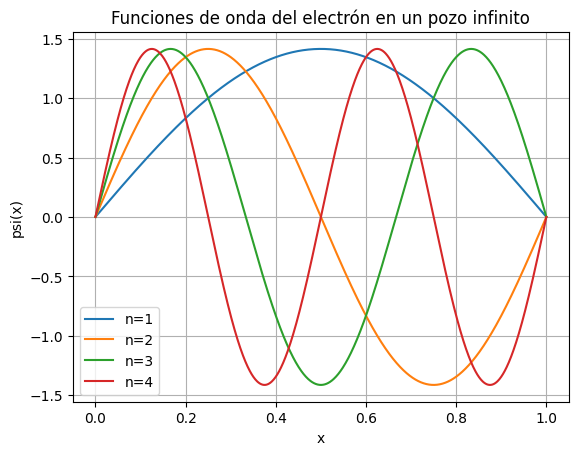

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def funcion_aproximacion(x, n):
    f_p = y**n*(y+1)*(y-1)  # Función de proximación


    return f_p

# Parámetros del pozo infinito
x_min = 0  # Límite inferior del pozo
x_max = 1  # Límite superior del pozo
n_levels = 5  # Número de niveles de energía para graficar

# Crear el vector de puntos x en el rango del pozo infinito
n_points = 1000  # Número de puntos entre x_min y x_max
x = np.linspace(x_min, x_max, n_points)

# Graficar todas las funciones de onda para los niveles de energía n=1 hasta n=n_levels
for n in range(1, n_levels+1):
    psi = wavefunction_pozo_infinito(x, n)
    plt.plot(x, psi, label=f'n={n}')

# Configuración de la gráfica
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.title('Funciones de onda del electrón en un pozo infinito')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Definir una matriz cuadrada
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Obtener los valores de la diagonal como un vector
diagonal = np.diag(matriz)

# Imprimir el vector de la diagonal
print(diagonal)

[1 5 9]
